# 02807: Project 3
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as an *.ipynb notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* The notebook must be runnable on Google Colab.
* This project is due on Wednesday, December 23, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python.
* For each question you should use exactly the cells provided for your solution
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 90.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contribution table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 90/3=30 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$



# Group declaration table 

This table must be filled before submission.



In [54]:
import pandas as pd

d = {'Exercise 1' : ["", "", "", ""], 
     'Exercise 2' : ["", "", "", ""]
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2','Part 3','Part 4']) 

ct

,Exercise 1,Exercise 2
Part 1,,
Part 2,,
Part 3,,
Part 4,,


# Imports

In [55]:
import numpy as np
import random

# Exercise 1: Sampling from a stream (51.5 points)


Stream sampling is the process of collecting a representative sample of the elements of a data stream. The sample is usually much smaller than the entire stream, but can be designed to retain important characteristics of the stream, and can be used to estimate many important aggregates on the stream. Generating good samples is crucial to many streaming applications.

In this exercise, you will sample simulated streams to solve a problem that goes like this: Given a stream of elements, we want to sample $k$ elements from it. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return $k$ random elements. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.




## Part 1: Sampling $k$ elements (5 pts)

Implement the version of reservoir sampling called "Simple algorithm" on the following Wikipedia entry: [Reservoir sampling](https://en.wikipedia.org/wiki/Reservoir_sampling#:~:text=Reservoir%20sampling%20is%20a%20family,to%20fit%20into%20main%20memory).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [56]:
class ReservoirSampler:
  def __init__(self, k):
    # k is the reservoir size
    # sample is the reservoir sample
    # n is the number of stream elements seen so far
    self.k = k
    self.sample = np.array([np.nan]*k)
    self.n = 0
  def update(self, element):
    # takes the last stream element and updates the sample reservoir
    # your code goes here
    if self.n < self.k:
      self.sample[self.n] = element
    else:
      j = random.randint(0,self.n)
      if j in range(0,self.k):
        self.sample[j] = element
    self.n += 1

Make sure that ``update`` method works correctly. To do so, run the following code cell and check that it updates the reservoir appropriately as stream elements are revealed over time. 


In [57]:
stream = np.arange(20) # a simulated stream
r = ReservoirSampler(2) # initialize a reservoir sampler with a reservoir of size 2
for e in stream: # receive stream elements one at a time
    r.update(e)  # update the reservoir
print("Sampled elements:", r.sample)

Sampled elements: [15.  9.]


Next, check the reservoir sampler experimentally. Do the following:

1.  100.000 times, draw a sample of size 4, from the stream above (``np.range(20)``) and store the result. 
2. Plot the number of times that each number in the input stream has been sampled, using a bar chart like the one shown below. 
If your implementation is correct, you should expect to draw each element with roughly the same frequency. 

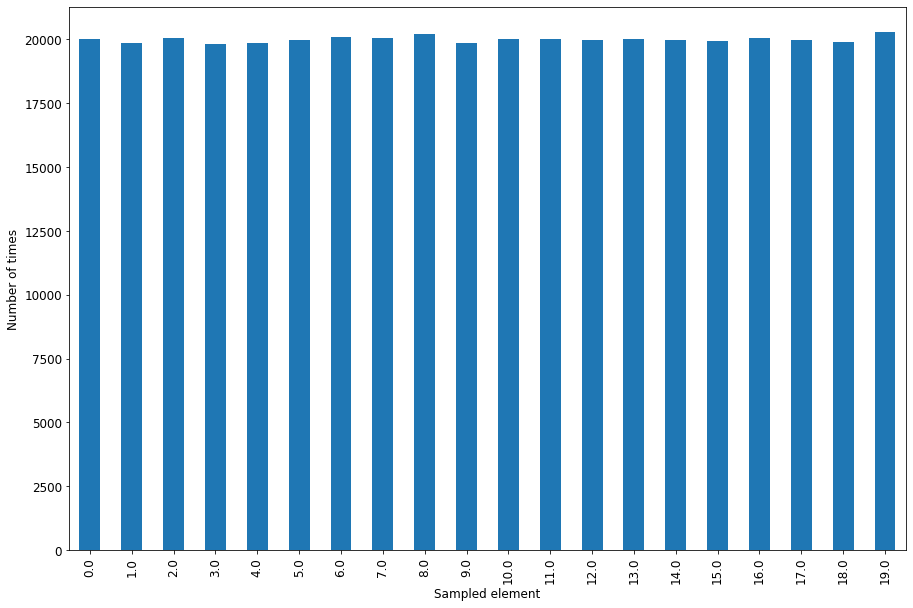


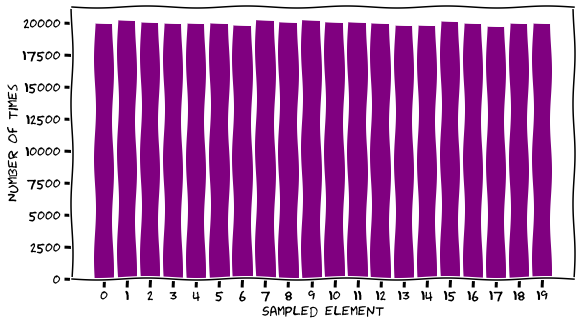

In [58]:
import matplotlib.pyplot as plt

def computeSample(stream, sample_size):
  # We implement the sampler over stream and return the sample string
  r = ReservoirSampler(sample_size)
  for e in stream:
    r.update(e)
  return r.sample

stream_size = 20
no_iter = 100000
sample_size = 4

plotty = np.zeros(stream_size)
stream = np.arange(stream_size)

for i in range(no_iter):
  sample = computeSample(stream, sample_size)
  sample = sample.astype('int32')
  plotty[sample] += 1

plt.xkcd(1,100,1)
plt.figure(figsize=(9,5))
plt.xticks(range(len(plotty)))
plt.xlabel('Sampled element')
plt.ylabel('Number of times')
plt.bar(range(len(plotty)), plotty, color='purple')
plt.show()

## Part 2: Merging reservoir samples: $2$ samples (20 pts)

We will sample from two streams, ``stream_1`` and ``stream_2``, using reservoir sampling, to generate two reservoirs, each of size $k=4$. The input streams are disjoint, i.e., there is no element occurring both in ``stream_1`` and ``stream_2``. 

In [59]:
stream_1 = np.arange(10)
stream_2 = np.arange(10,30)
sampler_1 = ReservoirSampler(4) # k=4
sampler_2 = ReservoirSampler(4) # k=4

for e in stream_1:
  sampler_1.update(e)
for e in stream_2:
  sampler_2.update(e)

When both samplers finish their stream traversal, two reservoirs, ``sampler_1.sample`` and ``sampler_2.sample`` have been generated. In addition, both sampler objects have counted the number of items in their own stream during the traversal, and thus the sizes of the input streams are known when the above code cell has been executed. In particular, they are stored in the sampler objects as ``sampler_1.n`` and ``sampler_2.n``. 

We want to combine the two reservoirs we have, ``sampler_1.sample`` and ``sampler_2.sample``, to generate a sample of size $k$ of elements coming from ``stream_1`` and ``stream_2``, where every element in ``stream_1`` and ``stream_2`` is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + n_2}$, where $n_1$ and $n_2$ are the sizes of ``stream_1`` and ``stream_2`` respectively. 

Implement a function called ``merge_samples(sampler_1, sampler_2)`` that generates and returns this sample. The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1`` and ``sampler_2`` to generate the final sample.


**Hint**: ``merge_samples`` should draw an element from ``sampler_1.sample`` with a different probabibility than from ``sampler_2.sample``, to correct for the fact that the two samples were obtained from streams of different sizes.

In [60]:
def merge_samples(sampler_1, sampler_2):
  # Define the stream lengths
  n1 = sampler_1.n
  n2 = sampler_2.n
  # Define k
  k = sampler_1.k
  # Define samples
  s1 = sampler_1.sample
  s2 = sampler_2.sample
  # Randomly shuffle the samples we are given, to ensure "true" randomness
  random.shuffle(s1)
  random.shuffle(s2)
  # Define an empty sample of size k
  samplemerge = ReservoirSampler(k)
  # define two counters to keep track of where to extract an element
  c1 = 0
  c2 = 0
  # Loop that fills the samplemerge with elements randomly
  for i in range(k):
    # random choice, to decide which element to add
    j = random.randint(0,n1+n2-1)
    if j in range(n1):
      samplemerge.update(s1[c1])
      c1 += 1
    else:
      samplemerge.update(s2[c2])
      c2 += 1
  samplemerge.n = n1+n2
  return samplemerge

Explain in words how your implementation of ``merge_samples`` works, and how it ensures that each element in the original two streams has the same probability of being in the output of ``merge_samples``. 

## Function explanation

Our function generates a random number $j$ between $0$ and $n_1 + n_2$. Then, if $j$ is between $0$ and $n_1$, it takes the first character on ``sampler_1``. If $j$ is between $n_1$ and $n_1 + n_2$ it takes the first character of ``sampler_2``. Next iterations will take next characters of the samplers, thanks to the counter variable we are keeping for each one of them.

We know the probability of a number being in ``sampler_1`` is $\frac{k}{n_1}$. Our function takes advantadge of the fact that the probability of j being between $0$ and $n_1$ is $\frac{n_1}{n_1+n_2}$ so that the final probability of a number from ``stream_1`` to end up in the merged sample is: 
$$\frac{k}{n_1} \cdot \frac{n_1}{n_1+n_2} = \frac{k}{n_1+n_2}.$$

In a similar way for ``sampler_2``: 
$$\frac{k}{n_2} \cdot \frac{n_2}{n_1+n_2} = \frac{k}{n_1+n_2}.$$

**Note:** As the position in which the characters are usually presented in ``sampler_1`` and ``sampler_2`` is not evenly distributed, first we need to randomly shuffle both samplers.

Next, check ``merge_samples`` experimentally. Do the following:

1. 50.000 times, create two reservoir samplers ``sampler_1=ReservoirSampler(4)`` and ``sampler_2 = ReservoirSampler(4)`` and update ``sampler_1`` traversing ``stream_1``, and ``sampler_2`` traversing ``stream_2``. Merge the two obtained samples with ``merge_samples`` and store the result.
2. Plot the number of times each number in the two input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.


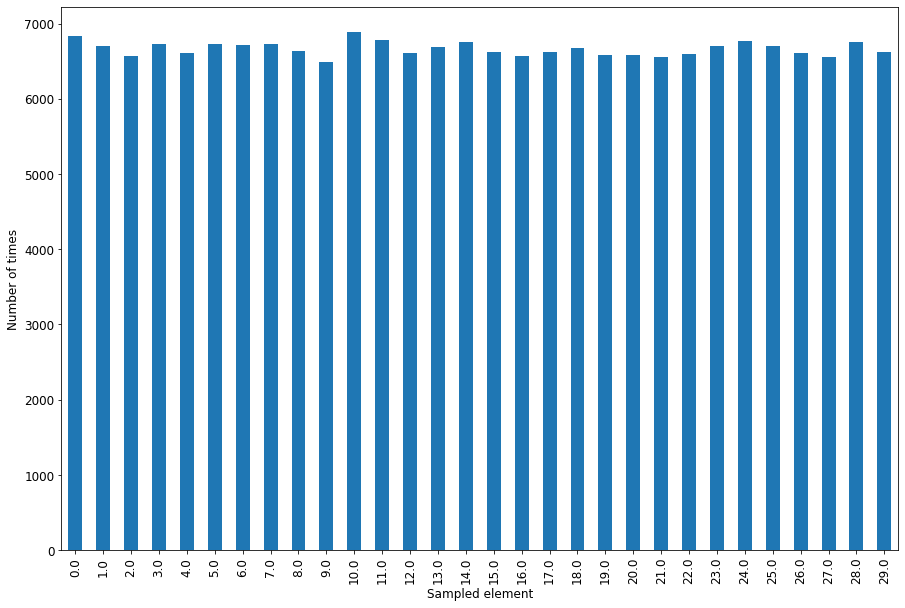


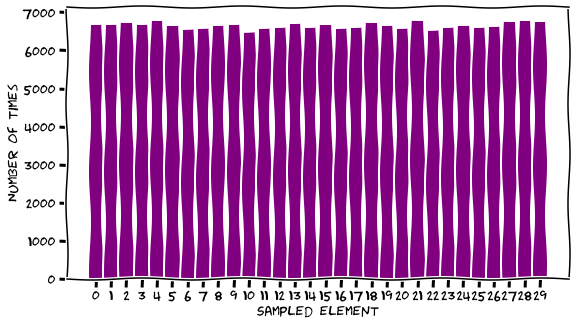

In [61]:
def compute2Samples(stream1,stream2, sample_size):
  # We implement the sampler over stream and return the sample string
  r1 = ReservoirSampler(sample_size)
  r2 = ReservoirSampler(sample_size)
  for e in stream1:
    r1.update(e)
  for e in stream2:
    r2.update(e)
  samplemerge = merge_samples(r1, r2)
  return samplemerge

stream1_size = 10
stream2_size = 20
no_iter = 50000
sample_size = 4

plotty = np.zeros(stream1_size+stream2_size)
stream1 = np.arange(10)
stream2 = np.arange(10,30)


for i in range(no_iter):
  samplemerge = compute2Samples(stream1,stream2, sample_size).sample
  samplemerge = samplemerge.astype('int32')
  plotty[samplemerge] += 1

plt.xkcd(1,100,1)
plt.figure(figsize=(9,5))
plt.xticks(range(len(plotty)))
plt.xlabel('Sampled element')
plt.ylabel('Number of times')
plt.bar(range(len(plotty)), plotty, color='purple')
plt.show()

## Part 3: Merging reservoir samples: $m$ samplers (11.5 pts)




In this part, you have to generalize your solution to Part 2 to develop a method that can combine $m$ reservoir samples, where $m\geq 2$. 

The input streams are disjoint, i.e., there is no element occurring both in ``stream_i`` and ``stream_j``, for any $i,j=1,\dots,m$ such that $i\neq j$. 

Implement a function ``merge_sample_list(sampler_list)`` that takes as input $m$ ``ReservoirSampler`` objects, ``sampler_1``,...,``sampler_m``, each having traversed streams ``stream_1``,...,``stream_m`` respectively, and each having as a result stored a sample of size $k$. 

The function has to use the $m$ reservoir samples to generate a final sample, of size $k$, of elements coming from ``stream_1``,...,``stream_m``, where every element is sampled with equal probability, i.e. with probability $\frac{k}{n_1 + ... + n_m}$, where $n_i$ is the sizes of ``stream_i``, for $i=1,...,m$. 

The function should not traverse the streams; it should only use the attributes of the sampler objects ``sampler_1``,..., ``sampler_m`` to generate the final sample.


**Hint**: you could define ``merge_sample_list`` so that it calls ``merge_sample`` repeatedly. But you are free to define ``merge_sample_list`` in any way you like.

In [62]:
def merge_sample_list(sampler_list):
  # shorten sampler_list
  s = sampler_list
  # Number of elements in sampler_list
  N = len(sampler_list)
  # Define empty sample
  samplemerge = merge_samples(s[0],s[1])
  for i in range(2,N):
    samplemerge = merge_samples(samplemerge,s[i])
  return samplemerge

Explain in words how your implementation of ``merge_sample_list`` works, and how it ensures that each element in the input streams has the same probability of being in the output of ``merge_sample_list``. 

## Explanation
The function works by iteratively running the merge_samples function. It starts by running it with the first two samples, and then saves this is in a reservoir sample "samplemerge". It then itervatively runs the merge_samples function with the current "samplemerge" and the next sample in the list, continuously overwriting samplemerge.

the probability is ensured because the merge_samples function ensures equal probability for two arbitrary samples, and we are iteratively running merge_samples in this way. Therefore the final sample will be chosen in a way that the original stream numbers all have an equal probability of being chosen for the final merged sample.

Next, check  ``merge_sample_list`` experimentally. Do the following:

1. 50.000 times, create three reservoir samplers, ``sampler_1=ReservoirSampler(4)``, ``sampler_2 = ReservoirSampler(4)`` and ``sampler_3 = ReservoirSampler(4)``, update ``sampler_1`` traversing ``stream_1 = np.arange(10)``, ``sampler_2`` traversing ``stream_2 = np.arange(10,30)`` and ``sampler_3`` traversing
``stream_3 = np.arange(30,40)``. Merge the three obtained samples with ``merge_sample_list`` and store the result.
2. Plot the number of times each number in the two input streams has been sampled by the above procedure, using a bar chart like the one shown below. If your implementation is correct, you should expect to draw each element with roughly the same frequency.

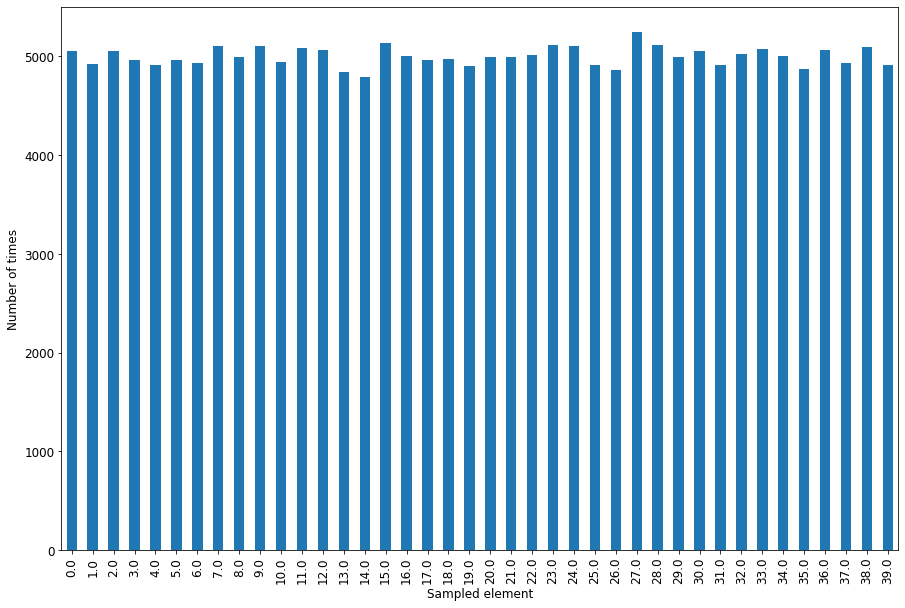


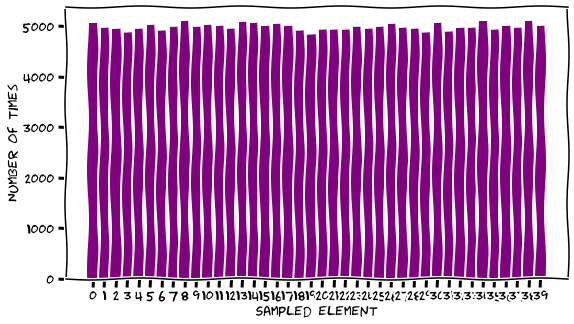

In [63]:
def computeMSamples(stream_list, sample_size):
  # We implement the sampler over stream and return the sample string
  r = []
  for i in range(len(stream_list)):
    r = np.append(r,ReservoirSampler(sample_size))
    for e in stream_list[i]:
      r[i].update(e)

  samplemerge = merge_sample_list(r)
  return samplemerge

stream1_size = 10
stream2_size = 20
stream3_size = 10
no_iter = 50000
sample_size = 4

plotty = np.zeros(stream1_size+stream2_size+stream3_size)
stream1 = np.arange(10)
stream2 = np.arange(10,30)
stream3 = np.arange(30,40)
streamlist = [stream1,stream2,stream3]

for i in range(no_iter):
  samplemerge = computeMSamples(streamlist, sample_size).sample
  samplemerge = samplemerge.astype('int32')
  plotty[samplemerge] += 1

plt.xkcd(1,100,1)
plt.figure(figsize=(9,5))
plt.xticks(range(len(plotty)))
plt.xlabel('Sampled element')
plt.ylabel('Number of times')
plt.bar(range(len(plotty)), plotty, color='purple')
plt.show()

## Part 4: Reservoir sampling from a stream with subgroups (15 pts)

Suppose you want to conduct a study to find the answer to the question "Are men or women better drivers?" in the general public. Due to limited time and resources you can only survey students on the campus of DTU. You draw a sample using simple random sampling and conclude that approximately 65% of the population thinks that men are better drivers.

What went wrong? The ratio between men and women at DTU does not reflect the general population (see eg. [this editorial](https://www.dtu.dk/english/About/ORGANIZATION/OFFICE-of-the-PRESIDENT/Editorials/June-2018)).

In this exercise you should use reservoir sampling to generate a sample of answers in which 50% of the answers come from men, and 50% come from women. You may extend the implementation of reservoir sampling from Part 1.

Use the following code to generate test data. It generates a stream of survey answers where about 65% of the answers are from males and most of the participants say that their own gender is the better driver.

In [64]:
answer_stream = []
for i in range(50000):
  gender = 1 if random.random() < 0.65 else 0
  answer = gender if random.random() < 0.98 else abs(gender-1)
  answer_stream.append((gender,answer))

Write a function ``sample_answers`` which processes ``answer_stream`` one element at a time, and returns a sample of answers coming 50% from women and 50% from men. The function should make use of reservoir sampling. The sample size should be 100. Every male student's answer in the stream should have the same probability of ending up in the sample. Every female student's answer in the stream should also have the same probability of ending up the sample.  

In [65]:
def sample_answers(answer_stream, sample_size):
  # define size of sample for men and women
  k = sample_size
  # Create empy reservoir samples for male and female
  rm = ReservoirSampler(k)
  rf = ReservoirSampler(k)
  # Loop that randomly chooses k men from the current list of men and k women from the current list of women
  for e in answer_stream:
    if e[0] == 1:
      rm.update(e[1])
    else:
      rf.update(e[1])
  # Merge the two randomly chosen samples of answers, so there is k from men and k from women
  finalanswers = np.append(rm.sample,rf.sample)
  return finalanswers

Explain in words how your implementation of ``sample_answers`` works and how it ensures the requirements stated above. 

## Explanation

Firstly we ensure that 50% of the the sample comes from men and 50% from women, by creating two empty revervoirs of half the given size, one for men and one for women. We then loop over the data using the update function to randomly add men with an equal probability to the mens sample, and the same for women. Finally, we append the two samples together to get the final result.

Process the ``answer_stream`` stream with ``sample answers`` and show the value counts for each answer. The sample should have roughly 50 answers indicating that men are better drivers, and 50 indicating that women are. Compute and show the value counts for each answer.

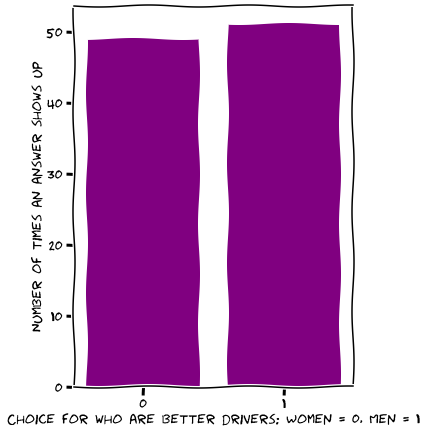

In [66]:
# Make a plot of the results
plotty = sample_answers(answer_stream,50)

plt.xkcd(1,100,1)
plt.figure(figsize=(5,7))
plt.xticks(range(len(plotty)))
plt.xlabel('Choice for who are better drivers: Women = 0, Men = 1')
plt.ylabel('Number of times an answer shows up')
plt.bar(range(2),[sum(plotty==0),sum(plotty==1)], color='purple')
plt.show()

# Exercise 2: Majority elements in a stream (38.5 points)

A very useful statistic for many streaming applications is to keep track of elements that occur frequently. This type of problem come in several flavours.

- *Mode* : Find the element (or elements) with the highest frequency.
- *Majority*: Find the element with strictly more than 50% occurrence in the stream - note that there may not be a majority element in a stream.
- *Threshold:* Find all elements that occur more than $f$ fraction of the stream
for any $0 < f \leq 1$. Finding majority is a special case with $f > 1/2$.

In this exercise, you will implement methods to compute majority elements from simulated streams. The total number of elements in the stream is not known in advance. At any point, someone could stop the stream, and we have to return a majority element, if it exists. You will implement a number of methods to solve this problem, under different assumptions and requirements concerning the data streams.


## Part 1: Finding the majority element (7 pts)

Implement the Boyer-Moore majority vote algorithm as described in the following Wikipedia entry: [Boyer-Moore majority vote algorithm](https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_majority_vote_algorithm).

Your implementation should fit into the following class. You only need to write the body of the ``update`` method.

In [67]:
class BM_Majority:
  def __init__(self):
    self.majority_element = None
    self.counter = 0
  def update(self, element):
    if (self.counter == 0):
      self.majority_element = element
      self.counter += 1
    elif (self.majority_element == element):
      self.counter +=  1
    else:
      self.counter -= 1

Make sure that the ``update`` method works correctly. To do so, run the following code cell and check that it provides the right output after traversing the stream. 

In [68]:
stream = np.random.randint(low=0,high=10,size=20)
print(stream)
m = BM_Majority()
for e in stream:
    m.update(e)
print("Majority element:", m.majority_element)

[2 3 7 0 2 8 8 0 3 1 4 7 6 2 9 5 7 8 3 9]
Majority element: 3


If the Boyer–Moore majority vote algorithm returns ``majority_element`` $e$, it either holds that $e$ is the majority element or there isn't a majority element.

Modify the implementation of the algorithm so that it always returns the majority element if there is one and ``None`` otherwise. 

**Hint**: A data stream may be traversed multiple times.


In [69]:
stream = np.random.randint(low=0,high=2,size=20)
print(stream)
m = BM_Majority()

for e in stream:
    m.update(e)

major_count = 0
for e in stream:
    if (e == m.majority_element):
        major_count += 1

if (major_count <= len(stream)/2):
    m.majority_element = None

print("Majority element:", m.majority_element)

[1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0]
Majority element: 0


## Part 2: Finding the majority element from 2 streams (20 pts)

We will now compute the majority element from two streams, ``stream_1`` and ``stream_2``, using the Boyer-Moore algorithm. For this part, we will assume that there are only two possible elements in the stream, ``0`` and ``1``.

In [70]:
stream_1 = np.random.randint(low=0,high=2,size=10)
stream_2 = np.random.randint(low=0,high=2,size=20)

print("Stream 1:", stream_1)
m_1 = BM_Majority()
for e in stream_1:
    m_1.update(e)

print("Majority element and counter:", m_1.majority_element,m_1.counter)

print("Stream 2:", stream_2)
m_2 = BM_Majority()
for e in stream_2:
    m_2.update(e)

print("Majority element and counter:", m_2.majority_element,m_2.counter)

Stream 1: [0 0 1 0 1 0 1 0 0 1]
Majority element and counter: 0 2
Stream 2: [0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1]
Majority element and counter: 0 8


We now have majority candidates and their corresponding counters for each of the two streams.

Implement a function called ``merge_majorities(m_1, m_2)`` that uses the majority elements and counters of ``m_1`` and ``m_2`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,stream_2))``.  The output of ``merge_majorities(m_1, m_2)`` should be identical to the one you would have gotten by processing the stream ``np.concatenate((stream_1,stream_2))`` with one ``BM_Majority()`` object.

The function should neither traverse the streams ``stream_1`` and ``stream_2`` again, nor traverse the stream ``np.concatenate((stream_1,stream_2))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,stream_2))`` using only the majority elements and counters of ``m_1`` and ``m_2``.

In [71]:
def merge_majorities(m_1,m_2):
  # Initialize the sums
  count_sum = 0
  
  # If there exists a majority element in m_1 do:
  if (m_1.counter != 0):
    # If the majority element is 1, add the count for
    # the majority element to the count sum.
    if (m_1.majority_element == 1):
      count_sum += m_1.counter
    else:
      # If the majority element is 0, subtract the values instead.
      count_sum -= m_1.counter
  
  # Do the same for m_2
  if (m_2.counter != 0):
    if (m_2.majority_element == 1):
      count_sum += m_2.counter
    else:
      count_sum -= m_2.counter

  # If the count_sum is negative, that means 0 is the majority element.
  if (count_sum < 0):
    print("Majority element is:", 0)
  # If the count_sum is positive, that means 1 is the majority element.
  elif (count_sum > 0):
    print("Majority element is:", 1)
  # If neither of these hold, that means the count_sum is 0, and there is no
  # majority element in the concatenated stream. We print "None".
  else:
    print("Majority element is:", None)

Explain in words how your implementation of ``merge_majorities`` works. 

### Explanation of merge_majorities
Every decision and condition is commented upon in the function definition, if you want to see what exactly happens and when.

A sum updates for every majority element in both streams. So we first check whether or not there even exists a majority element in the stream, checking if the .counter is non-zero. Then, if the majority_element is 1 we add the .counter to the sum, and if the majority element is 0, we subtract it. 

Thus, we can get 3 different results:

1. The sum is positive, meaning there are more 1's than 0's. We then output that the majority element is 1.
2. The sum is negative, meaning there are more 0's than 1's. We then output that the majority element is 0.
3. The sum is 0, meaning there are exactly the same amount of 1's and 0's in the concatenated stream. We output "None".

## Part 3: Finding the majority element from $j$ streams (11.5 pts)

In this part, we have to generalize your solution to Part 2. We will compute the majority element from $j$ streams, ``stream_1``,..., ``stream_j``, using the Boyer-Moore algorithm. We will still assume that there are only two possible elements in the streams, ``0`` and ``1``.

Implement a function ``merge_majorities_list(m_list)`` that takes as input $j$ ``BM_Majority`` objects, ``m_1``,...,``m_j``, each having traversed streams ``stream_1``,...,``stream_j`` respectively to compute their majority elements. 

The function should use the majority elements and counters of ``m_1``,..., ``m_j`` to compute the majority element and counter for the concatenated stream ``np.concatenate((stream_1,...,stream_j))``. The output of ``merge_majorities_list(m_list)`` should be identical to the one you would have gotten by processing the stream consisting of the concatenation of ``stream_1``,...,``stream_j`` with one ``BM_Majority()`` object.

The function should neither traverse the streams ``stream_1``,...,``stream_j`` again, nor traverse the stream ``np.concatenate((stream_1,...,stream_j))``. It should find and return the majority element and counter for the stream ``np.concatenate((stream_1,...,stream_j))`` using only the majority elements and counters of ``m_1``,...,``m_j``.

**Hint**: you could define ``merge_majorities_list`` so that it calls ``merge_majorities`` repeatedly. But you are free to define ``merge_majorities_list`` in any way you like.

In [72]:
def merge_majorities_list(m_list):
  # Initialize the sums and the length of the for-loop
  count_sum = 0
  j = len(m_list)

  # As before, we only do something if there exists a majority element in the
  # stream. We add to the sum if the majority element is 1, and we subtract
  # if the majority element is 0.
  for k in range(j):
    if (m_list[k].counter != 0):
      if (m_list[k].majority_element == 1):
        count_sum += m_list[k].counter
      else:
        count_sum -= m_list[k].counter

  # If the count_sum is negative, that means 0 is the majority element.
  if (count_sum < 0):
    print("Majority element is:", 0)
  # If the count_sum is positive, that means 1 is the majority element.
  elif (count_sum > 0):
    print("Majority element is:", 1)
  # If neither of these hold, that means the count_sum is 0, and there is no
  # majority element in the concatenated stream. We print "None".
  else:
    print("Majority element is:", None)

Explain in words how your implementation of ``merge_majorities`` works. 

### Explanation of merge_majorities_list
Every decision and condition is commented upon in the function definition, if you want to see what exactly happens and when.

The only difference between doing it for $j$ different streams, instead of only the two, is that now we initialize the length of the list, and calculate the sum in a for-loop. The remaining code is completely the same.

A sum updates for every majority element in both streams. So we first check whether or not there even exists a majority element in the stream, checking if the .counter is non-zero. Then, if the majority_element is 1 we add the .counter to the sum, and if the majority element is 0, we subtract it. 

Thus, we can get 3 different results:

1. The sum is positive, meaning there are more 1's than 0's. We then output that the majority element is 1.
2. The sum is negative, meaning there are more 0's than 1's. We then output that the majority element is 0.
3. The sum is 0, meaning there are exactly the same amount of 1's and 0's in the concatenated stream. We output "None".